In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.stats
import seaborn as sns
from glob import glob
from zimp.readability.dale_chall import DaleChallScore

plt.style.use('seaborn-whitegrid')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package perluniprops to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package perluniprops is already up-to-date!


In [2]:
def get_ds_language(ds):
    if ds in ['10K-GNAD', 'GERMEVAL-2018', 'GERMEVAL-2020']:
        return 'german'
    return 'english'

def get_train_texts(ds_path, dataset):
    if 'train.csv' in ds_path:
        return dataset.text
    ds_path = ds_path.replace('test', 'train')
    return pd.read_csv(ds_path).text

score_builders = {
    'dale_chall': lambda lang: DaleChallScore(language=lang)
}


source_dir = '../../zimp_orchestrator/orch/resources'
rs = []
df_confs = {}
for file in glob('confidence/confidence*.csv'):
    dataset =  file.split('_')[-2]
    train_test = file.split('_')[-1].split('.')[0]
    source_file = os.path.join(source_dir, dataset, train_test + '.csv')
    df_conf = pd.read_csv(file)
    df_text = pd.read_csv(source_file)
    lang = get_ds_language(file.split('_')[-2])
    for score in score_builders:
        print(f'Analyzing {file} for score {score}')
        file_path = f'dalechall/{score}_{"_".join(file.split("_")[-2:])}'
        if os.path.exists(file_path):
            df_conf[score] = pd.read_csv(file_path)
        else:
            df_conf[score] = score_builders[score](lang).get_scores(df_text.text)
            df_conf[score].to_csv(file_path, index=False)
        rs.append({
            'pearson_p_true': scipy.stats.pearsonr(df_conf['p_true'], df_conf[score])[0],
            'spearman_p_true': scipy.stats.spearmanr(df_conf['p_true'], df_conf[score])[0],
            'pearson_conf': scipy.stats.pearsonr(df_conf['mean'], df_conf[score])[0],
            'spearman_conf': scipy.stats.spearmanr(df_conf['mean'], df_conf[score])[0],
            'model': '_'.join(file.split('_')[1:-2]),
            'dataset': dataset,
            'train_test': train_test,
            'language': lang,
            'score': score
        })
    
        df_confs[score + '_' + '_'.join(file.split('_')[1:])[:-4]] = df_conf
    
df_corr = pd.DataFrame(rs)
df_corr

Analyzing confidence\confidence_BERT_DBP-14_test.csv for score dale_chall
Analyzing confidence\confidence_BERT_DBP-14_train.csv for score dale_chall
Analyzing confidence\confidence_BERT_TREC-6_test.csv for score dale_chall
Analyzing confidence\confidence_BERT_TREC-6_train.csv for score dale_chall
Analyzing confidence\confidence_BERT_YELP-5_test.csv for score dale_chall
Analyzing confidence\confidence_BERT_YELP-5_train.csv for score dale_chall
Analyzing confidence\confidence_DECISION_TREE_10K-GNAD_test.csv for score dale_chall
Analyzing confidence\confidence_DECISION_TREE_10K-GNAD_train.csv for score dale_chall
Analyzing confidence\confidence_DECISION_TREE_DBP-14_test.csv for score dale_chall
Analyzing confidence\confidence_DECISION_TREE_DBP-14_train.csv for score dale_chall
Analyzing confidence\confidence_DECISION_TREE_GERMEVAL-2018_test.csv for score dale_chall
Analyzing confidence\confidence_DECISION_TREE_GERMEVAL-2018_train.csv for score dale_chall
Analyzing confidence\confidence_DE

,pearson_p_true,spearman_p_true,pearson_conf,spearman_conf,model,dataset,train_test,language,score
0,-0.022586,-0.024118,-0.053707,-0.074108,BERT,DBP-14,test,english,dale_chall
1,-0.023448,-0.024326,-0.048600,-0.074964,BERT,DBP-14,train,english,dale_chall
2,0.005006,0.020314,0.047155,0.050854,BERT,TREC-6,test,english,dale_chall
3,0.014210,0.012298,0.067755,0.061003,BERT,TREC-6,train,english,dale_chall
4,-0.027288,-0.039066,-0.118775,-0.179320,BERT,YELP-5,test,english,dale_chall
5,-0.048738,-0.077665,-0.123397,-0.200273,BERT,YELP-5,train,english,dale_chall
6,-0.026162,-0.028543,-0.036850,-0.030337,DECISION_TREE,10K-GNAD,test,german,dale_chall
7,-0.042112,-0.039846,-0.037054,-0.024149,DECISION_TREE,10K-GNAD,train,german,dale_chall
8,-0.022629,-0.017540,-0.044516,-0.043066,DECISION_TREE,DBP-14,test,english,dale_chall
9,-0.027379,-0.022908,-0.049116,-0.043801,DECISION_TREE,DBP-14,train,english,dale_chall


In [3]:
df_corr.score.value_counts()

dale_chall    60
Name: score, dtype: int64

In [4]:
for score in df_corr.score.unique():
    print(score)
    print(df_corr[df_corr.score == score][['pearson_p_true', 'spearman_p_true', 'pearson_conf', 'spearman_conf']].mean())
    print('-'*20)

dale_chall
pearson_p_true    -0.016528
spearman_p_true   -0.019487
pearson_conf      -0.022848
spearman_conf     -0.042155
dtype: float64
--------------------


In [5]:
for score in df_corr.score.unique():
    df_sc = df_corr[df_corr.score == score]
    df_model_corr = df_sc.groupby(['model'])[['pearson_p_true', 'spearman_p_true', 'pearson_conf', 'spearman_conf']].mean()
    print(score)
    print(df_model_corr)
    print('-'*20)

dale_chall
               pearson_p_true  spearman_p_true  pearson_conf  spearman_conf
model                                                                      
BERT                -0.017141        -0.022094     -0.038261      -0.069468
DECISION_TREE       -0.019519        -0.023343     -0.021929      -0.013363
FASTTEXT            -0.030631        -0.027945     -0.115210      -0.137380
GERMAN_BERT          0.000372        -0.013065      0.020825       0.005678
RANDOM_FOREST       -0.002144        -0.005505      0.080759       0.042577
SVM                 -0.021963        -0.023062     -0.049141      -0.070712
--------------------


In [6]:
for score in df_corr.score.unique():
    df_sc = df_corr[df_corr.score == score]
    df_model_corr = df_sc.groupby(['train_test'])[['pearson_p_true', 'spearman_p_true', 'pearson_conf', 'spearman_conf']].mean()
    print(score)
    print(df_model_corr)
    print('-'*20)

dale_chall
            pearson_p_true  spearman_p_true  pearson_conf  spearman_conf
train_test                                                              
test             -0.012817        -0.016184     -0.024776      -0.033387
train            -0.020240        -0.022790     -0.020919      -0.050922
--------------------


In [7]:
def get_latex_method_name(model_type):
    if model_type == 'GERMAN_BERT':
        return 'GER\_BERT'
    elif model_type == 'DECISION_TREE':
        return 'DT'
    elif model_type == 'RANDOM_FOREST':
        return 'RF'
    elif model_type == 'FASTTEXT':
        return 'FT'
    elif model_type == 'DUMMY':
        return 'BASE'
    return model_type.replace('_', '\_')

def get_latex_metric(metric_str, max_abs_score, method):
    is_max = np.abs(metric_str) == max_abs_score
    
    metric_str = np.round(metric_str,3)
    if is_max:
        return '\mathbf{' + str(metric_str) + '}'
    return metric_str

In [8]:
reported_methods = ['DUMMY', 'DECISION_TREE', 'RANDOM_FOREST', 'SVM', 'FASTTEXT', 'BERT', 'GERMAN_BERT']
print("""
\\begin{table}[]
    \small
    \centering
    \\begin{tabular}{l|cc|}
        Method & $\\rho_1$ & $\\rho'_1$ \\\\ \hline
""")

for method in reported_methods:
    if method not in df_corr.model.values:
        continue
    s = ' ' * 8
    s += '\\textit{' + get_latex_method_name(method) + '}'
    for score in ['dale_chall']:
        s += ' & '
        df_model_means = df_corr[(df_corr.score==score)].groupby('model').mean()
        df_c = df_corr[(df_corr.score==score) & (df_corr.model==method)]
        s += ' & '.join([f'${get_latex_metric(df_c[metric].mean() , df_model_means[metric].abs().max(), method)}$' for metric in ['spearman_p_true', 'spearman_conf']])
    s +=  ' \\\\'
    print(s)

print("""
    \end{tabular}
    \caption[Correlation between different lively scores and classification metrics]{Spearman correlation coefficients for lively scores and the ratio of correct model instances $(\\rho)$, and the average prediction confidence $(\\rho')$. 
    The index number indicates the used lively score: (1) vocabulary size, (2) out-of-vocabulary size with default word list, (3) out-of-vocabulary size with training set word list, (4) lively score with training set word list}
    \label{tab:corr_lively}
\end{table}
""")


\begin{table}[]
    \small
    \centering
    \begin{tabular}{l|cc|}
        Method & $\rho_1$ & $\rho'_1$ \\ \hline

        \textit{DT} & $-0.023$ & $-0.013$ \\
        \textit{RF} & $-0.006$ & $0.043$ \\
        \textit{SVM} & $-0.023$ & $-0.071$ \\
        \textit{FT} & $-0.028$ & $\mathbf{-0.137}$ \\
        \textit{BERT} & $-0.022$ & $-0.069$ \\
        \textit{GER\_BERT} & $-0.013$ & $0.006$ \\

    \end{tabular}
    \caption[Correlation between different lively scores and classification metrics]{Spearman correlation coefficients for lively scores and the ratio of correct model instances $(\rho)$, and the average prediction confidence $(\rho')$. 
    The index number indicates the used lively score: (1) vocabulary size, (2) out-of-vocabulary size with default word list, (3) out-of-vocabulary size with training set word list, (4) lively score with training set word list}
    \label{tab:corr_lively}
\end{table}



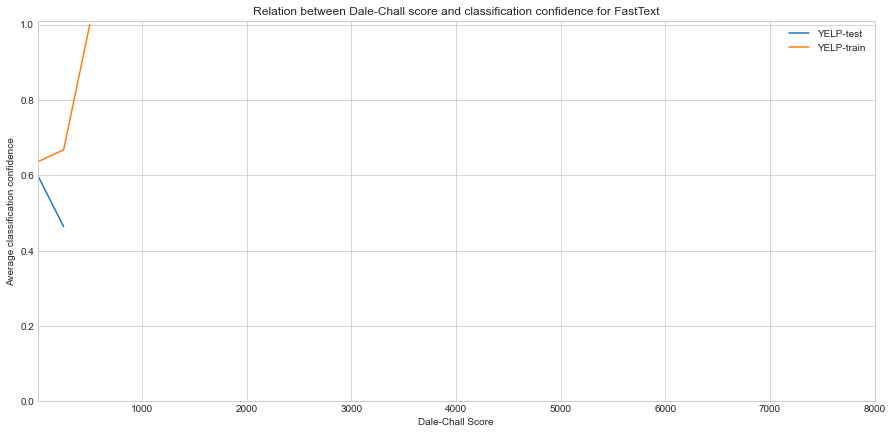

In [9]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1, 1, 1)

score = 'dale_chall'
bucket_size=250
ds_keys = [ds for ds in df_confs if f'{score}_FASTTEXT_YELP-5' in ds]
trace_names = []
for ds in ds_keys:
    df_confs[ds][score+'_bucket'] = df_confs[ds][score].apply(lambda x: bucket_size* round(x/bucket_size))
    df_confs[ds].groupby([score+'_bucket'])['p_true'].mean().plot(ax=ax, xlim=(1,8000), ylim=(0,1.01))
    trace_names.append(ds)
    
plt.title('Relation between Dale-Chall score and classification confidence for FastText')
plt.xlabel('Dale-Chall Score')
plt.ylabel('Average classification confidence')
#ax.legend(trace_names)
ax.legend(['YELP-test', 'YELP-train'])
plt.savefig(f'confidence/012_corr_dale_yelp.pdf')
plt.show()

In [10]:
df_corr[(df_corr.score=='dale_chall') & (df_corr.train_test=='test')].sort_values(by='spearman_p_true').head(n=30)

,pearson_p_true,spearman_p_true,pearson_conf,spearman_conf,model,dataset,train_test,language,score
36,-0.138160,-0.128899,-0.089989,-0.069124,RANDOM_FOREST,10K-GNAD,test,german,dale_chall
26,-0.090908,-0.081518,-0.078111,-0.021458,FASTTEXT,TREC-6,test,english,dale_chall
48,-0.060313,-0.069712,-0.119061,-0.096056,SVM,10K-GNAD,test,german,dale_chall
56,-0.075580,-0.066474,-0.109072,-0.095938,SVM,TREC-6,test,english,dale_chall
30,-0.031155,-0.063757,-0.138011,-0.141010,GERMAN_BERT,10K-GNAD,test,german,dale_chall
58,-0.046663,-0.057963,-0.033667,-0.047881,SVM,YELP-5,test,english,dale_chall
14,-0.064036,-0.054100,-0.054342,0.001198,DECISION_TREE,TREC-6,test,english,dale_chall
38,-0.005218,-0.042376,0.033440,0.001937,RANDOM_FOREST,DBP-14,test,english,dale_chall
28,-0.033157,-0.040481,-0.175667,-0.266920,FASTTEXT,YELP-5,test,english,dale_chall
4,-0.027288,-0.039066,-0.118775,-0.179320,BERT,YELP-5,test,english,dale_chall
